***Problem Statement***: One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

***ML Problem***: With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

***Target Variable***: `persistency_flag`  

***Task***:

- Problem understanding   
- Data Understanding  
- Data Cleaning and Feature engineering  
- Model Development  
- Model Selection  
- Model Evaluation  
- Report the accuracy, precision and recall of both the class of target variable  
- Report ROC-AUC as well  
- Deploy the model  
- Explain the challenges and model selection  

## Feature Description

| Bucket                   | Variable                            | Variable Description                                                                                                                                                                                                                                                                         |
|--------------------------|-------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Unique Row Id            | Patient ID                          | Unique ID of each patient                                                                                                                                                                                                                                                                    |
| Target Variable          | Persistency_Flag                    | Flag indicating if a patient was persistent or not                                                                                                                                                                                                                                           |
| Demographics             | Age                                 | Age of the patient during their therapy                                                                                                                                                                                                                                                      |
|                          | Race                                | Race of the patient from the patient table                                                                                                                                                                                                                                                   |
|                          | Region                              | Region of the patient from the patient table                                                                                                                                                                                                                                                 |
|                          | Ethnicity                           | Ethnicity of the patient from the patient table                                                                                                                                                                                                                                              |
|                          | Gender                              | Gender of the patient from the patient table                                                                                                                                                                                                                                                 |
|                          | IDN Indicator                       | Flag indicating patients mapped to IDN                                                                                                                                                                                                                                                       |
| Provider Attributes      | NTM - Physician Specialty           | Specialty of the HCP that prescribed the NTM Rx                                                                                                                                                                                                                                              |
| Clinical Factors         | NTM - T-Score                       | T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate)                                                                                                                                                                                                          |
|                          | Change in T Score                   | Change in Tscore before starting with any therapy and after receiving therapy  (Worsened, Remained Same, Improved, Unknown)                                                                                                                                                                  |
|                          | NTM - Risk Segment                  | Risk Segment of the patient at the time of the NTM Rx (within 2 years days prior from rxdate)                                                                                                                                                                                                |
|                          | Change in Risk Segment              | Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown)                                                                                                                                                             |
|                          | NTM - Multiple Risk Factors         | Flag indicating if  patient falls under multiple risk category (having more than 1 risk) at the time of the NTM Rx (within 365 days prior from rxdate)                                                                                                                                       |
|                          | NTM - Dexa Scan Frequency           | Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate)                                                                                                                                                                                                |
|                          | NTM - Dexa Scan Recency             | Flag indicating the presence of Dexa Scan before the NTM Rx (within 2 years prior from rxdate or between their first Rx and Switched Rx; whichever is smaller and applicable)                                                                                                                |
|                          | Dexa During Therapy                 | Flag indicating if the patient had a Dexa Scan during their first continuous therapy                                                                                                                                                                                                         |
|                          | NTM - Fragility Fracture Recency    | Flag indicating if the patient had a recent fragility fracture (within 365 days prior from rxdate)                                                                                                                                                                                           |
|                          | Fragility Fracture During Therapy   | Flag indicating if the patient had fragility fracture  during their first continuous therapy                                                                                                                                                                                                 |
|                          | NTM - Glucocorticoid Recency        | Flag indicating usage of Glucocorticoids (>=7.5mg strength) in the one year look-back from the first NTM Rx                                                                                                                                                                                  |
|                          | Glucocorticoid Usage During Therapy | Flag indicating if the patient had a Glucocorticoid usage during the first continuous therapy                                                                                                                                                                                                |
| Disease/Treatment Factor | NTM - Injectable Experience         | Flag indicating any injectable drug usage in the recent 12 months before the NTM OP Rx                                                                                                                                                                                                       |
|                          | NTM - Risk Factors                  | Risk Factors that the patient is falling into. For chronic Risk Factors complete lookback to be applied and for non-chronic Risk Factors, one year lookback from the date of first OP Rx                                                                                                     |
|                          | NTM - Comorbidity                   | Comorbidities are divided into two main categories - Acute and chronic, based on the ICD codes. For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied |
|                          | NTM - Concomitancy                  | Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate)                                                                                                                                                                                         |
|                          | Adherence                           | Adherence for the therapies                                                                                                                                                                                                                                                                  |

## EDA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import sklearn

from sklearn.cluster import KMeans

# Import PCA
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [2]:
# bring in cleaned dataset
df = pd.read_csv('data/data.csv', index_col='ptid')

In [3]:
df.head()

,persistency_flag,gender_male,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,idn_indicator,injectable_experience_during_rx,...,risk_segment_prior_ntm_vlr_lr,tscore_bucket_prior_ntm_>-2.5,risk_segment_during_rx_vlr_lr,risk_segment_during_rx_no_t_risk_during_rx,tscore_bucket_during_rx_>-2.5,tscore_bucket_during_rx_no_t_risk_during_rx,change_t_score_no change,change_t_score_worsened,change_t_score_no_t_risk_during_rx,adherent_flag_non-adherent
ptid,,,,,,,,,,,,,,,,,,,,,
P1,1,1,0,0,0,0,0,0,0,1,...,1,1,1,0,0,0,1,0,0,0
P2,0,1,0,0,0,0,0,0,0,1,...,1,1,0,1,0,1,0,0,1,0
P4,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
P5,0,0,1,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
P6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


Precision vs False Positive rate is used for ROC/AUC when there is a class imbalance

In [4]:
df.dtypes

persistency_flag                               int64
gender_male                                    int64
gluco_record_prior_ntm                         int64
gluco_record_during_rx                         int64
dexa_freq_during_rx                            int64
                                               ...  
tscore_bucket_during_rx_no_t_risk_during_rx    int64
change_t_score_no change                       int64
change_t_score_worsened                        int64
change_t_score_no_t_risk_during_rx             int64
adherent_flag_non-adherent                     int64
Length: 107, dtype: object

In [5]:
X = df.drop('persistency_flag', axis = 1)
y = df[['persistency_flag']]

In [6]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

In [7]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans model with 3 clusters: model
    model = KMeans(n_clusters=k, n_init='auto')

    # Use fit_predict to fit model and obtain cluster labels: 
    model.fit_predict(X)

    # Create a DataFrame with clusters and varieties as columns: df
    #preds = pd.DataFrame({'Prediction': labels, 'Actual': y['persistency_flag']})

    inertias.append(model.inertia_)

    # Create crosstab: ct
    #ct = pd.crosstab(preds['Prediction'], preds['Actual'])
    #print(ct)

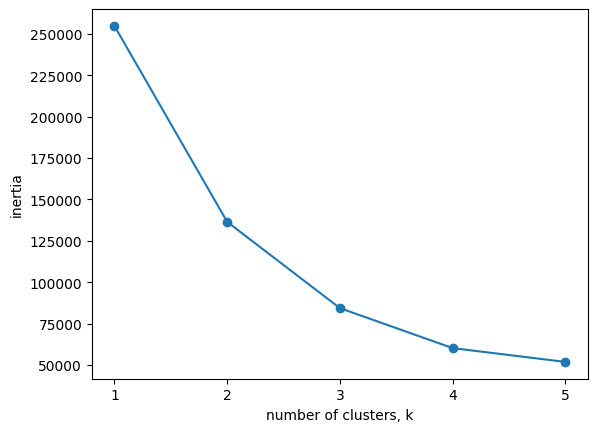

In [8]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


PCA

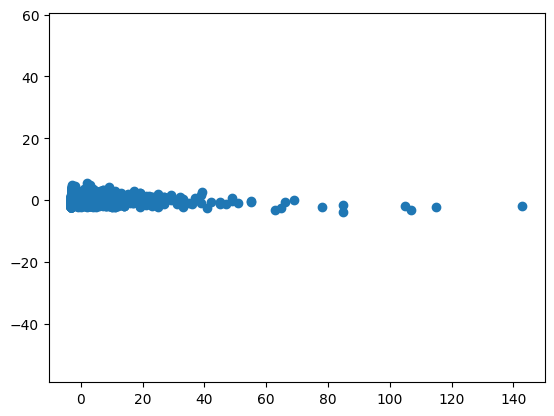

2.0252861296232218e-16


In [9]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(X)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

In [10]:
pca_features

array([[-3.00818958e+00, -7.78308646e-01, -1.77787501e+00, ...,
         7.07177545e-16,  3.24696903e-16, -6.17849507e-17],
       [-3.06859789e+00, -2.23523428e+00,  1.23607786e-01, ...,
         2.36062572e-15, -2.28728080e-16, -5.82862083e-16],
       [-2.99153336e+00,  4.63415238e-01, -7.10595185e-01, ...,
        -2.28418099e-15,  3.24295634e-16, -1.49341220e-15],
       ...,
       [ 4.00503827e+00,  4.93490348e-01, -6.34602469e-01, ...,
        -7.44775815e-17, -9.87245923e-17,  1.26324544e-17],
       [-3.06017001e+00, -1.80906848e+00,  2.43475406e-01, ...,
         2.13043714e-16, -2.07350198e-16,  1.51116782e-16],
       [-3.07027457e+00, -7.55671502e-01,  9.91849187e-01, ...,
         3.43883950e-17,  1.31996259e-16,  1.61395389e-16]])

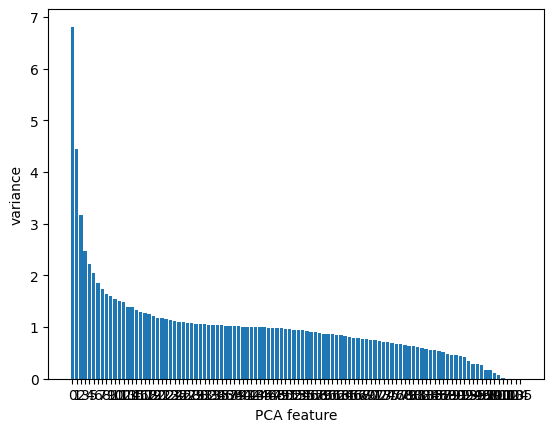

In [11]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


Random Forest

In [12]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                stratify=y, random_state=SEED)

In [13]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

/var/folders/g1/lrn62zbd6hb4cz0pmbz3jv8c0000gn/T/ipykernel_3600/2663419257.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=25, random_state=2)

In [14]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**0.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.37


In [18]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values(ascending=False)

importances_sorted

dexa_freq_during_rx                                                0.270266
comorb_long_term_current_drug_therapy                              0.046557
comorb_encounter_for_screening_for_malignant_neoplasms             0.030463
comorb_encounter_for_immunization                                  0.027704
comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx    0.025749
                                                                     ...   
ntm_speciality_orthopedics                                         0.000000
ntm_speciality_gastroenterology                                    0.000000
ntm_speciality_psychiatry and neurology                            0.000000
ntm_speciality_pain medicine                                       0.000000
ntm_speciality_podiatry                                            0.000000
Length: 106, dtype: float64

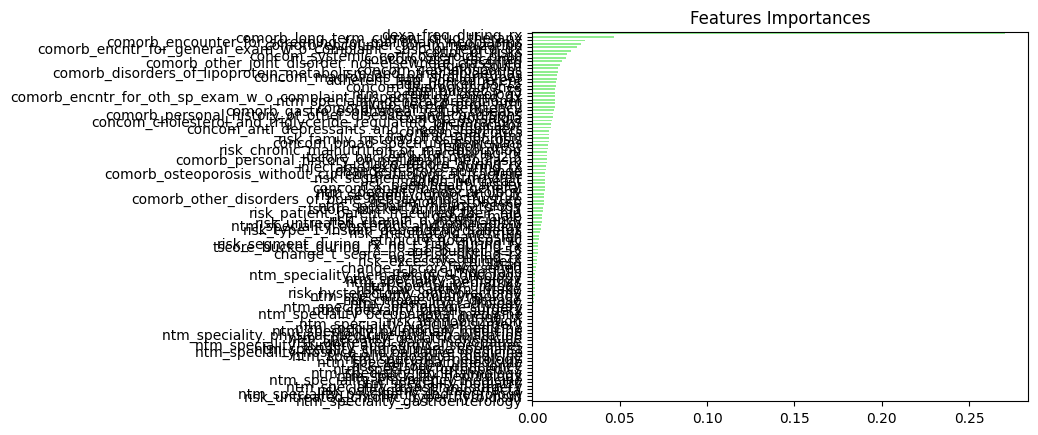

In [17]:
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()